In [1]:
# skin cancer


In [2]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input,Dense,Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential

import os
from IPython.display import display
from IPython.display import Image as _Imdis

import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

In [3]:
## upload the kaggle json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
## this will download the dataset

!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 98% 318M/325M [00:03<00:00, 120MB/s]
100% 325M/325M [00:03<00:00, 97.3MB/s]


In [5]:
from zipfile import ZipFile

dataset = "/content/skin-cancer-malignant-vs-benign.zip"

with ZipFile(dataset,"r" ) as zip:
  zip.extractall()
  print("the dataset has been extracted ")

the dataset has been extracted 


In [6]:
## lets have the train and test path defined

train_path = "/content/train"
test_path = "/content/test"

number of images with us 1440
3.jpg


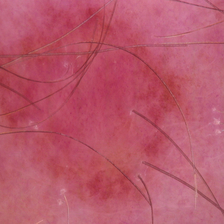

108.jpg


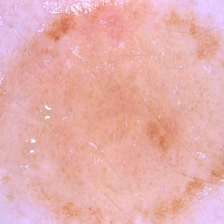

542.jpg


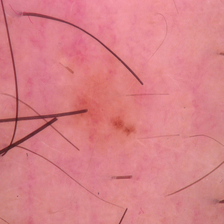

1390.jpg


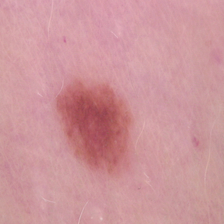

1406.jpg


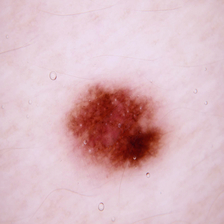

511.jpg


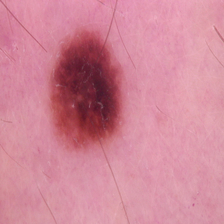

82.jpg


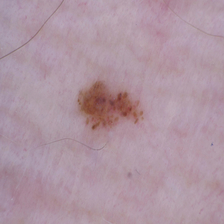

1500.jpg


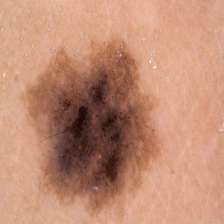

1531.jpg


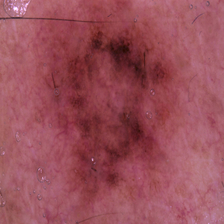

1709.jpg


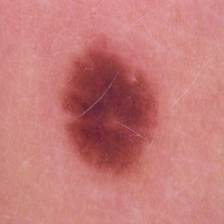

In [7]:
from PIL import Image

folder = train_path + "/benign"

benignfiles = [f for f  in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]

print(f"number of images with us {len(benignfiles)}")

for i in range(10):
  print(benignfiles[i])
  display(_Imdis(filename = folder + "/" + benignfiles[i] ,width = 300,height = 300))

In [8]:
# keras.applications.VGG16(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )

In [9]:
## ARGUMENTS
"""
Arguments

include_top: whether to include the 3 fully-connected layers at the top of the network.
weights: one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.
input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
pooling: Optional pooling mode for feature extraction when include_top is False.
None means that the output of the model will be the 4D tensor output of the last convolutional block.
avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
max means that global max pooling will be applied.
classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.
classifier_activation: A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".


"""

'\nArguments\n\ninclude_top: whether to include the 3 fully-connected layers at the top of the network.\nweights: one of None (random initialization), "imagenet" (pre-training on ImageNet), or the path to the weights file to be loaded.\ninput_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.\ninput_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with "channels_first" data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.\npooling: Optional pooling mode for feature extraction when include_top is False.\nNone means that the output of the model will be the 4D tensor output of the last convolutional block.\navg means that global average pooling will be applied to the output of the last convolutional block, and thus the ou

In [10]:
# lets define the input shape
image_shape =[224,224,3]


In [11]:
# lets create he model instance
vgg_model=VGG16(
    input_shape =image_shape,
    weights='imagenet',
    include_top=False
)

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [13]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
for layers in vgg_model.layers:
  print(layers)
  layers.trainable=False


In [15]:
x = Flatten()(vgg_model.output)
prediction=Dense(1,activation='sigmoid')(x)
model=Model(inputs=vgg_model.input,
            outputs=prediction)


In [16]:
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [17]:
vgg_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
from tensorflow.keras import metrics
import tensorflow as tf

# from keras import optimizers
from keras import optimizers


In [20]:
metric=['accuracy',
        metrics.Precision(name='Prec'),
        metrics.Recall(name='Rec'),
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.TrueNegatives(name='tn')
]

In [21]:
adam = optimizers.Adam(

)

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer = adam,
    metrics = metric
)

In [23]:
# preprocessing of data
train_datagen = ImageDataGenerator(
                                    rescale=1/225,
                                    rotation_range=40,
                                    width_shift_range=.2,
                                    height_shift_range=0.2,
                                    shear_range=.2,
                                    zoom_range=.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(
                                  rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = .2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = "nearest"
)


In [27]:
## pass the data through objects

train_data = train_datagen.flow_from_directory(
                                        train_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = "binary"
)

test_data = test_datagen.flow_from_directory(
                                        test_path,
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = "binary"
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [32]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
                      filepath = "vgg16_model.h5",
                      verbose = True,
                      save_best_only = True
)

callbacks = [checkpoint]

start = datetime.now()

history = model.fit(
                  train_data ,
                  validation_data = test_data,
                  epochs = 15,
                  batch_size = 32,
                  callbacks = callbacks,
                  verbose = True
)

duration = datetime.now() - start





Epoch 1/15
83/83 [==============================] - ETA: 0s - loss: 0.5051 - accuracy: 0.7486 - Prec: 0.7338 - Rec: 0.7001 - tp: 838.0000 - tn: 1136.0000
Epoch 1: val_loss improved from inf to 0.41866, saving model to vgg16_model.h5
83/83 [==============================] - 69s 702ms/step - loss: 0.5051 - accuracy: 0.7486 - Prec: 0.7338 - Rec: 0.7001 - tp: 838.0000 - tn: 1136.0000 - val_loss: 0.4187 - val_accuracy: 0.8258 - val_Prec: 0.7713 - val_Rec: 0.8767 - val_tp: 263.0000 - val_tn: 282.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
83/83 [==============================] - ETA: 0s - loss: 0.4143 - accuracy: 0.8130 - Prec: 0.7928 - Rec: 0.7962 - tp: 953.0000 - tn: 1191.0000
Epoch 2: val_loss improved from 0.41866 to 0.36404, saving model to vgg16_model.h5
83/83 [==============================] - 61s 734ms/step - loss: 0.4143 - accuracy: 0.8130 - Prec: 0.7928 - Rec: 0.7962 - tp: 953.0000 - tn: 1191.0000 - val_loss: 0.3640 - val_accuracy: 0.8303 - val_Prec: 0.8092 - val_Rec: 0.8200 - val_tp: 246.0000 - val_tn: 302.0000
Epoch 3/15
83/83 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.8184 - Prec: 0.7962 - Rec: 0.8062 - tp: 965.0000 - tn: 1193.0000
Epoch 3: val_loss did not improve from 0.36404
83/83 [==============================] - 49s 593ms/step - loss: 0.3923 - accuracy: 0.8184 - Prec: 0.7962 - Rec: 0.8062 - tp: 965.0000 - tn: 1193.0000 - val_loss: 0.3881 - val_accuracy: 0.8076 - val_Prec: 0.8474 - val_Rec: 0.7033 - val_tp: 211.0000 - val_tn: 322.0000
Epoch 4/15
83/83 [==========

In [40]:
from tensorflow.keras.models import load_model

def predict(url):

  width,height = 224,224
  img = image.load_img(url,target_size = (width,height))
  img = image.img_to_array(img)

  img = np.expand_dims(img,axis =0)
  img = img/255

  model = load_model("/content/vgg16_model.h5")
  result = model.predict(img)

  if result[0][0] >= 0.5:
    prediction = "Malignant"
  else:
    prediction = "Benign"

  return prediction


1/1 [==============================] - 1s 1s/step
predicted type of skin cancer is :  Benign


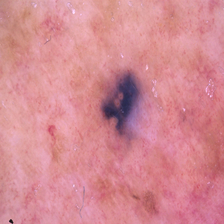

In [41]:
url = "/content/test/benign/1019.jpg"

img = image.load_img(url,target_size = (224,224))
print("predicted type of skin cancer is : ",predict(url))
img